In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

In [5]:
np.random.seed(2024)

# Loading in the data
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

In [3]:
N = 500
learning_rates = np.logspace(-4, -1, N)
scores = np.zeros(N)

for idx, lr in enumerate(learning_rates):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', MLPClassifier(hidden_layer_sizes=(50,), 
                                max_iter=50, 
                                random_state=2024, 
                                learning_rate_init=lr, 
                                batch_size=10, 
                                activation='logistic'))
    ])

    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)

    scores[idx] = score

c:\Users\maria\anaconda3\envs\fysstk3155\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\maria\anaconda3\envs\fysstk3155\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\maria\anaconda3\envs\fysstk3155\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\maria\anaconda3\envs\fysstk3155\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mar

In [4]:
np.save('Results/MLP_scores_lr.npy', scores)

### Confusion matrix

In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', MLPClassifier(hidden_layer_sizes=(100,), max_iter=50, random_state=2024, learning_rate_init=0.01, batch_size=10, activation='logistic', alpha=0.01))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evauluate the Model
accuracy = pipeline.score(X_test, y_test)
print(f'test accuracy: {accuracy:.4f}')

test accuracy: 0.9649


In [7]:
cm = confusion_matrix(y_test, y_pred)

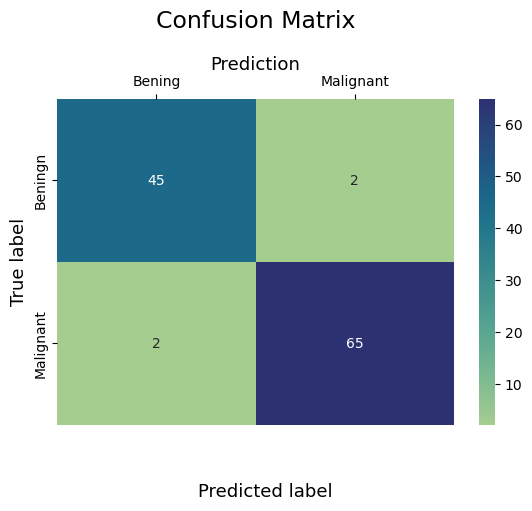

In [8]:
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Bening','Malignant'],
            yticklabels=['Beningn','Malignant'],
            cmap='crest')
plt.ylabel('True label', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.45, 0.05, 'Predicted label', ha='center', fontsize=13)
plt.show()
